# **Pip & Requirements**

In [664]:
#pip install -r /workspaces/Boosting-Algorithms/requirements.txt

In [736]:
#pip install graphviz 

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 2.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# **All Imports**

In [665]:
import timeit
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from pickle import dump
import xgboost as xgb
from xgboost import plot_tree

# **Initializations**

In [666]:
global_start_time = timeit.default_timer()

## **Step 1: Data Import**

In [667]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Save raw data

In [668]:
total_data.to_csv("/workspaces/Boosting-Algorithms/data/raw/rawdatafile.csv", index = False)

## **Step 2: Exploration and Data Cleaning**


In [669]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [670]:
total_data_c = total_data.copy()
total_data_c.Outcome = total_data_c.Outcome.astype('object')

In [671]:
total_data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [672]:
total_data_c.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [673]:
total_data_c.describe(include='object').T

,count,unique,top,freq
Outcome,768,2,0,500


 **Drop Duplicates**

In [674]:
#Checking for duplicates
total_data_c.duplicated().sum()

0

In [675]:
total_data_c = total_data_c.drop_duplicates().reset_index(drop = True)
total_data_c.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Null Values management**

In [676]:
total_data_c.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

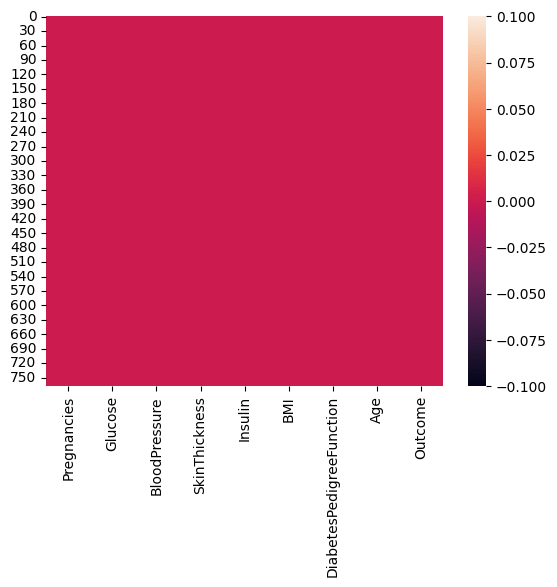

In [677]:
sns.heatmap(total_data_c.isnull())

## **Step 2: Exploration, data cleaning and Visualization**

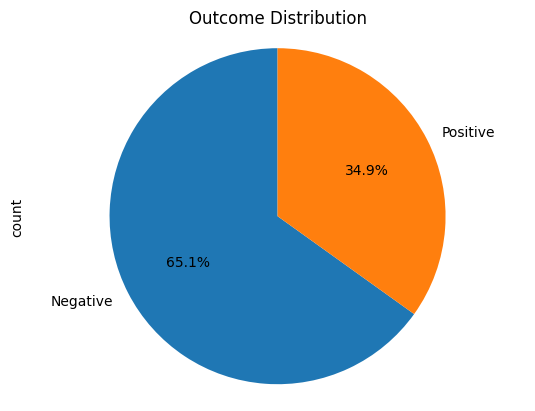

In [678]:
total_data_c['Outcome'] = total_data_c['Outcome'].replace({0: 'Negative', 1: 'Positive'})

# Create a pie chart
total_data_c['Outcome'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Outcome Distribution')
plt.show()


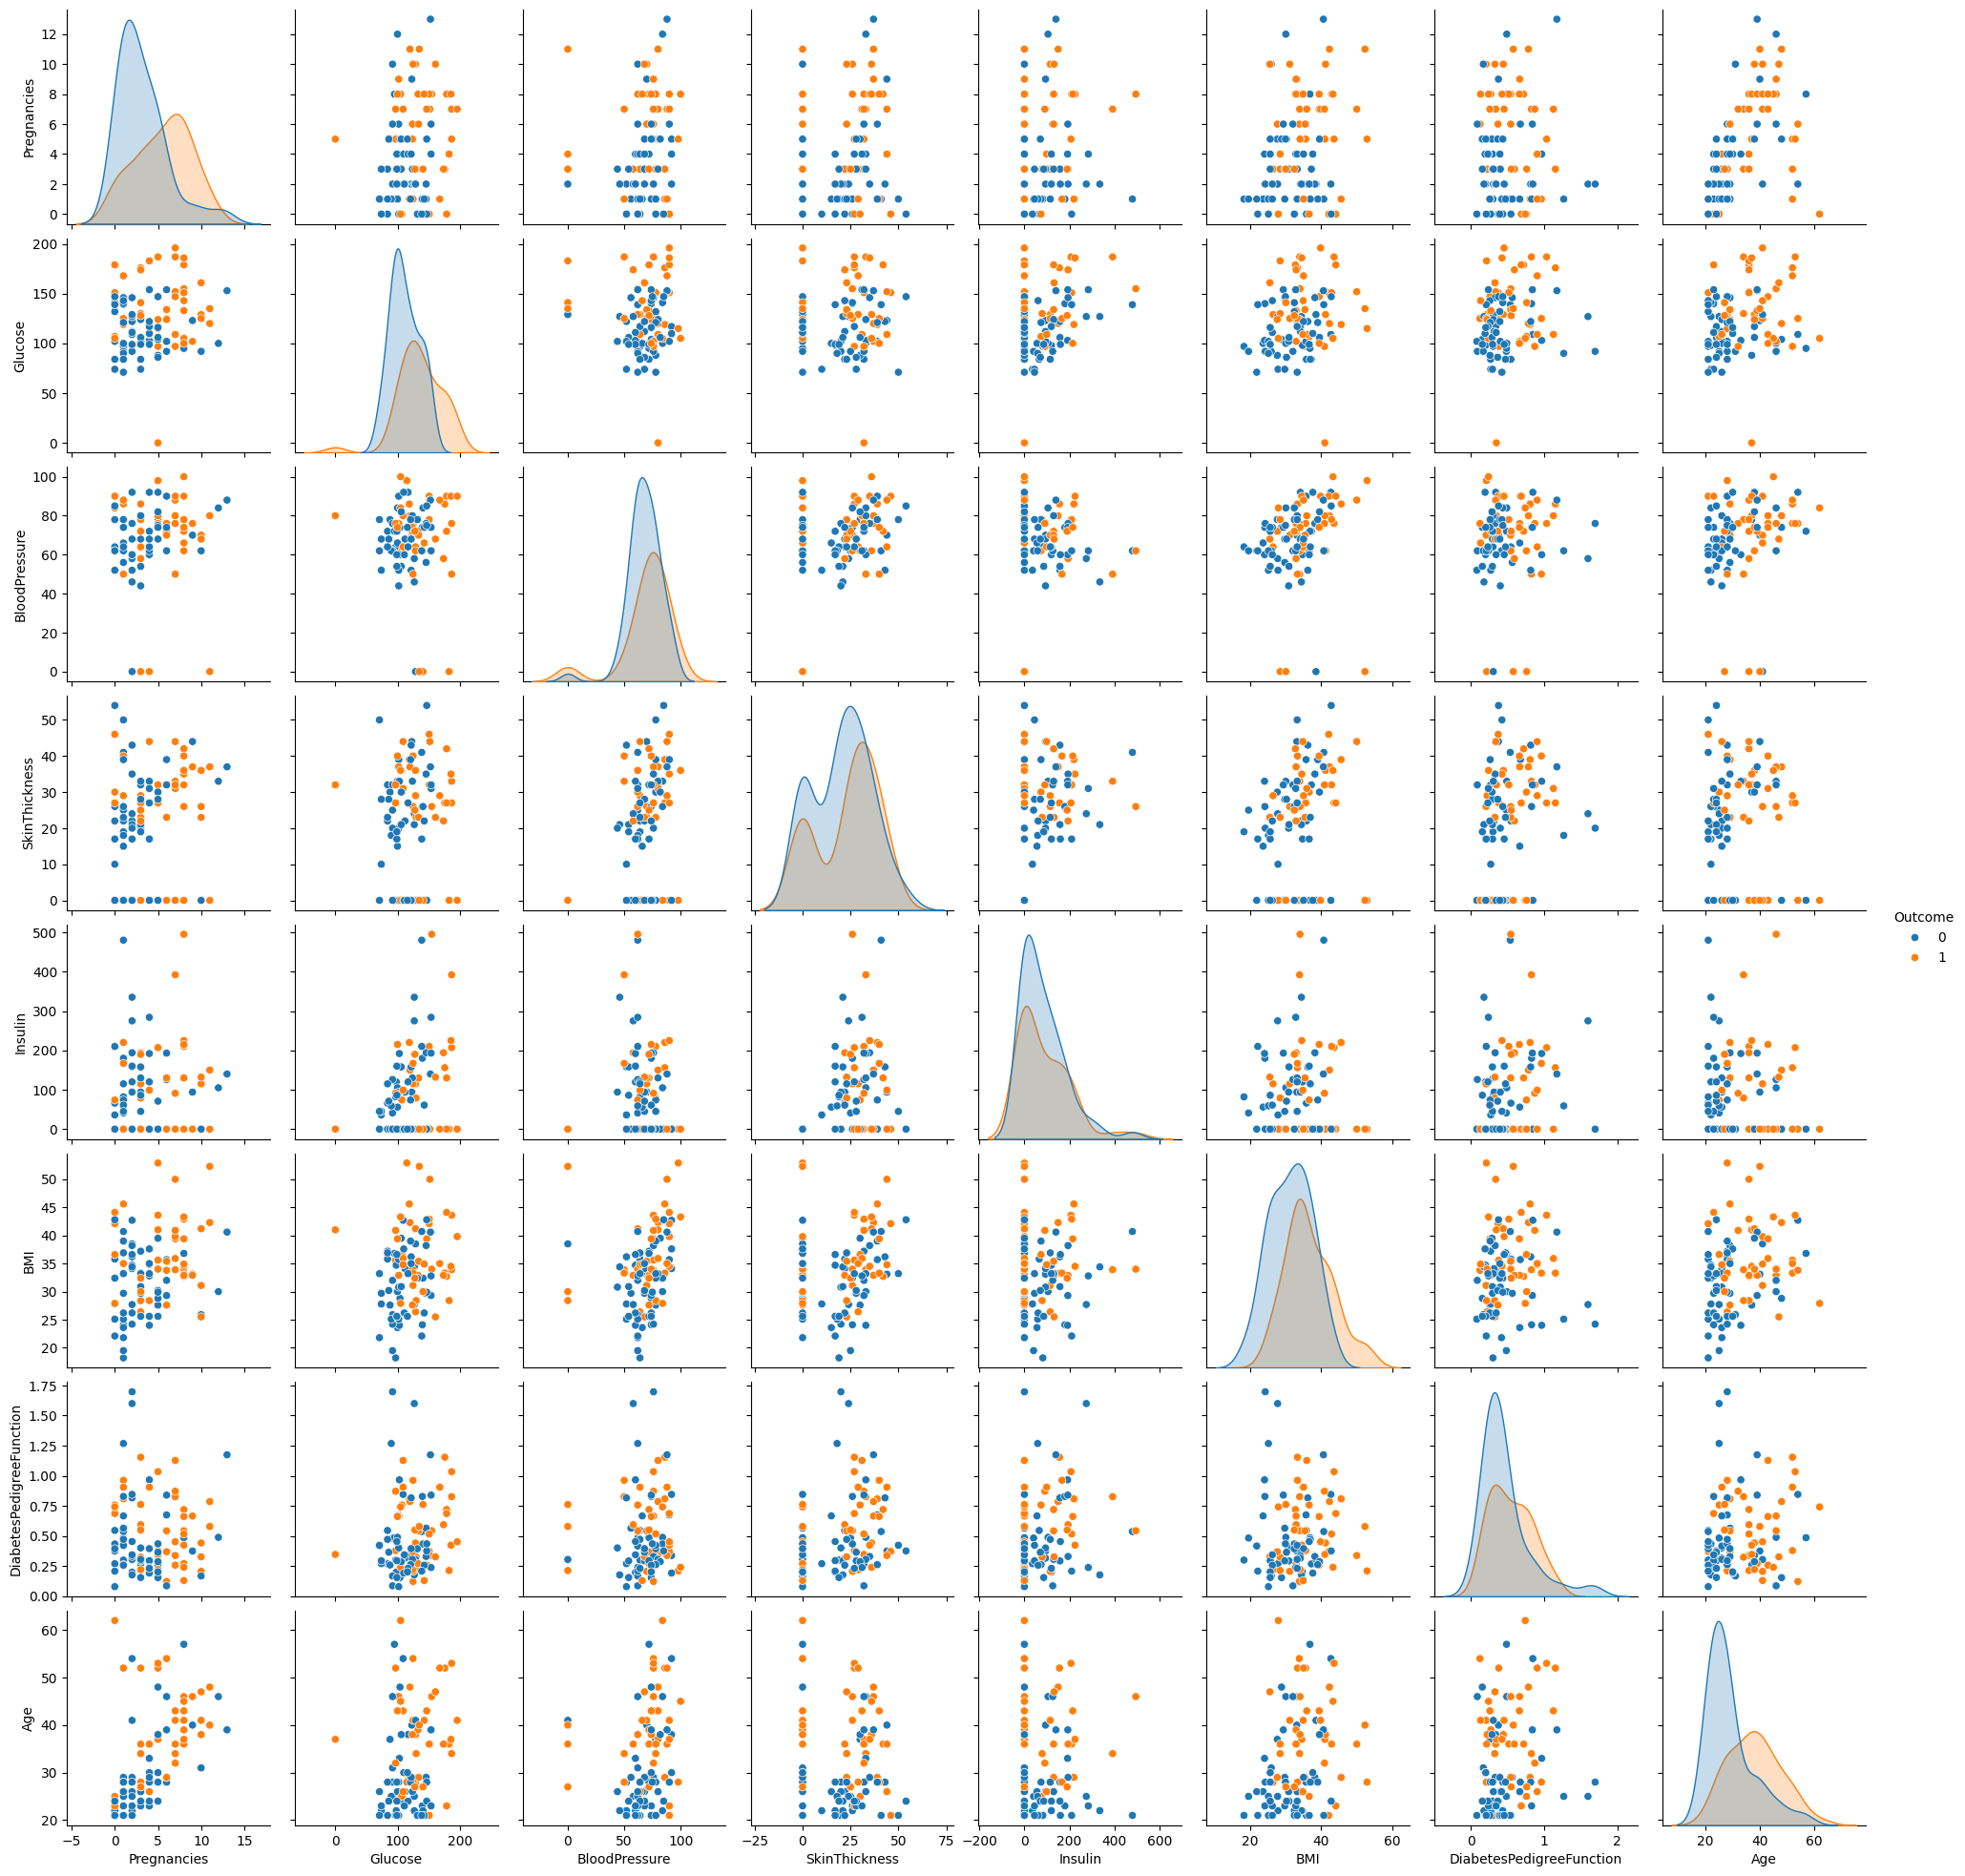

In [679]:
sns.pairplot(total_data.sample(100), hue='Outcome')
plt.show()

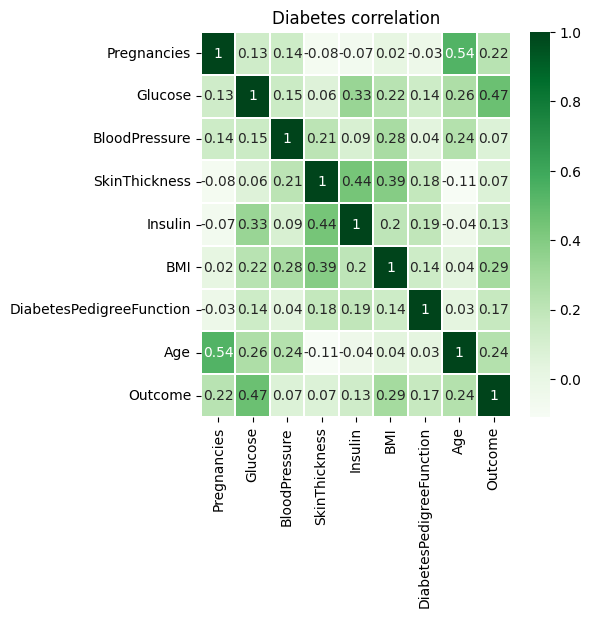

In [680]:
plt.figure(figsize = (5,5))
plt.title('Diabetes correlation')
corr = total_data.corr()
sns.heatmap(round(corr,2),xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Greens", annot=True)
plt.show()

Correlation relationships with the 'Outcome' variable (threshold > 0.13):
                   Variable  Correlation
1                   Glucose     0.466581
3                       BMI     0.292695
5                       Age     0.238356
0               Pregnancies     0.221898
4  DiabetesPedigreeFunction     0.173844
2                   Insulin     0.130548


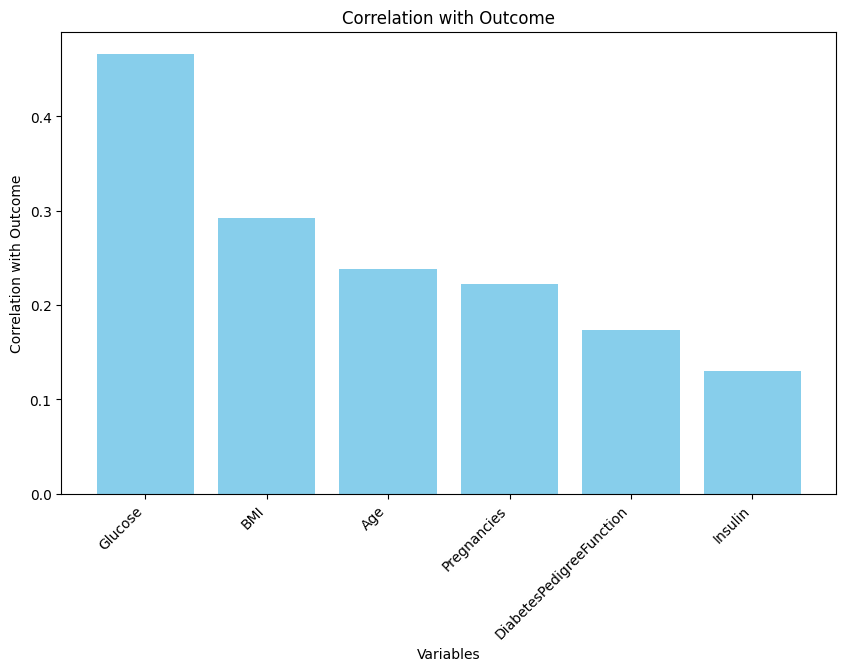

In [681]:
warnings.filterwarnings("ignore", category=FutureWarning)

# Calculate the correlation matrix
correlation_matrix = total_data.corr()

# Create a DataFrame to store the relationships
relations_df = pd.DataFrame(columns=['Variable', 'Correlation'])

# Set the correlation threshold
correlation_threshold = 0.13

# Loop through variables and calculate correlation with Outcome
for column in correlation_matrix.columns:
    if column != 'Outcome':  # Skip the Outcome variable itself
        correlation_value = correlation_matrix.loc['Outcome', column]
        
        # Check if the absolute correlation value is greater than the threshold
        if abs(correlation_value) > correlation_threshold:
            temp_df = pd.DataFrame({'Variable': [column], 'Correlation': [correlation_value]})
            relations_df = pd.concat([relations_df, temp_df], ignore_index=True)

# Sort the DataFrame by the magnitude of correlation
relations_df = relations_df.sort_values(by='Correlation', ascending=False)

# Print the DataFrame
print(f"Correlation relationships with the 'Outcome' variable (threshold > {correlation_threshold}):")
print(relations_df)

# Optional: Bar chart to visualize the correlations
plt.figure(figsize=(10, 6))
plt.bar(relations_df['Variable'], relations_df['Correlation'], color='skyblue')
plt.xlabel('Variables')
plt.ylabel('Correlation with Outcome')
plt.title('Correlation with Outcome')
plt.xticks(rotation=45, ha='right')
plt.show()


warnings.filterwarnings("default", category=FutureWarning)


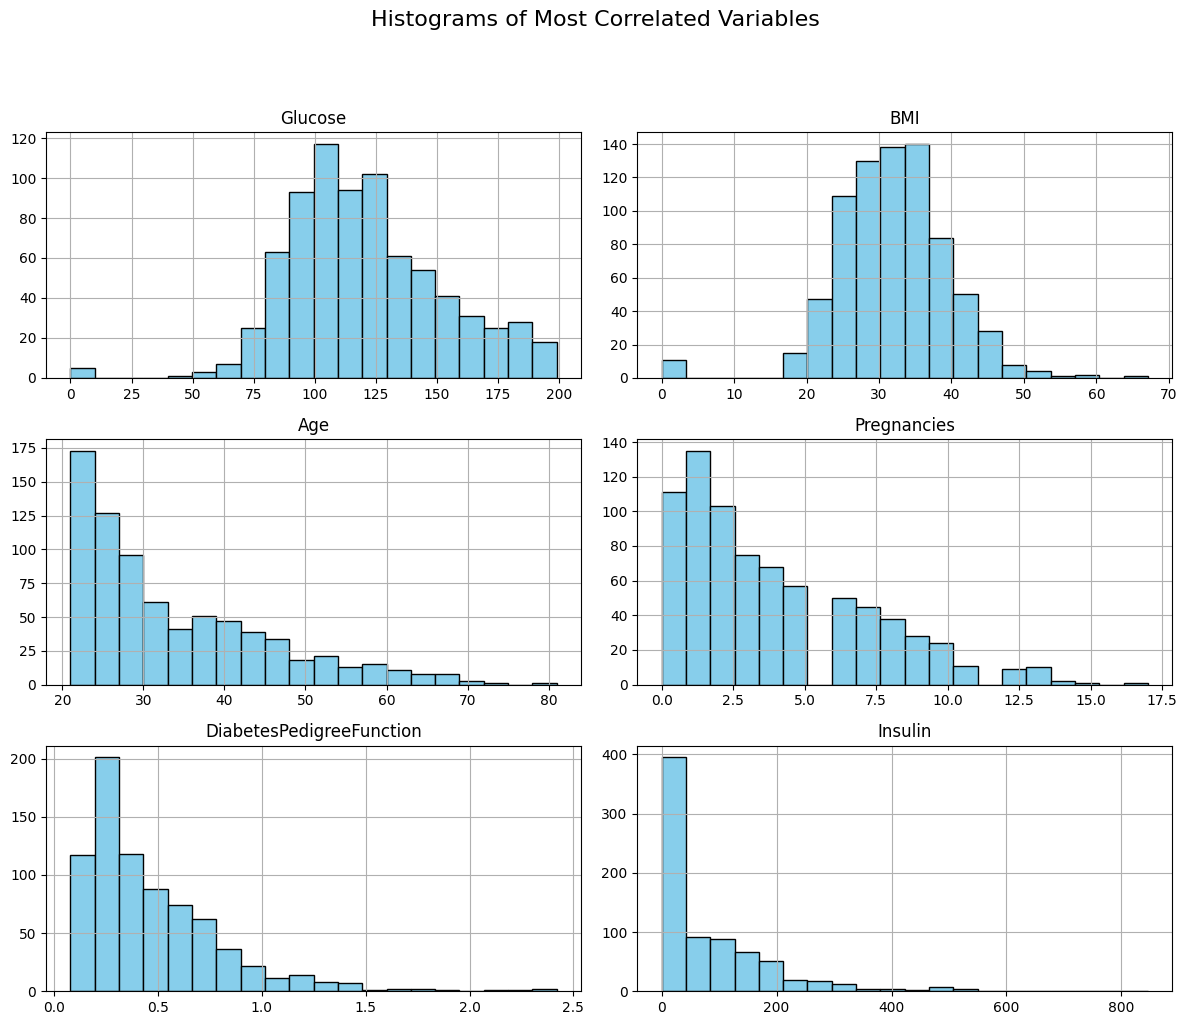

In [682]:
most_correlated_vars = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction', 'Insulin' ]
filtered_data = total_data[most_correlated_vars]

# Plot histograms of the most correlated variables
filtered_data.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Most Correlated Variables', x=0.5, y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to prevent overlap
plt.show()


### Eliminate irrelevant information

In [683]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [684]:
total_data.drop(['SkinThickness', 'BloodPressure'], axis=1, inplace=True)

In [685]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   Insulin                   768 non-null    int64  
 3   BMI                       768 non-null    float64
 4   DiabetesPedigreeFunction  768 non-null    float64
 5   Age                       768 non-null    int64  
 6   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 42.1 KB


In [686]:
total_data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


([<matplotlib.axis.XTick at 0x7f3630954290>,
 [Text(0, 0, 'HEALTHY'), Text(1, 0, 'Diabetes')])

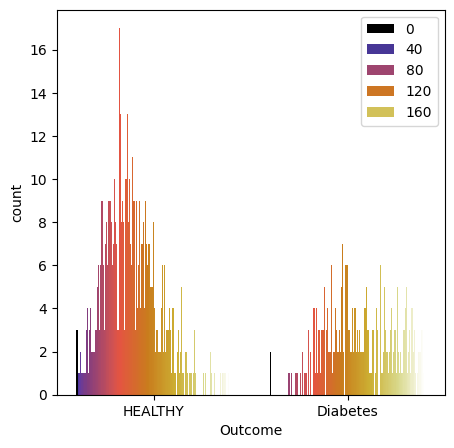

In [687]:
#Glucose vs outcome

labels = ['HEALTHY', 'Diabetes']

fig, ax1 = plt.subplots(figsize=(5,5))
graph=sns.countplot(ax=ax1,x='Outcome',hue="Glucose",data=total_data, palette="CMRmap")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
plt.legend( loc = "best")
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=0)

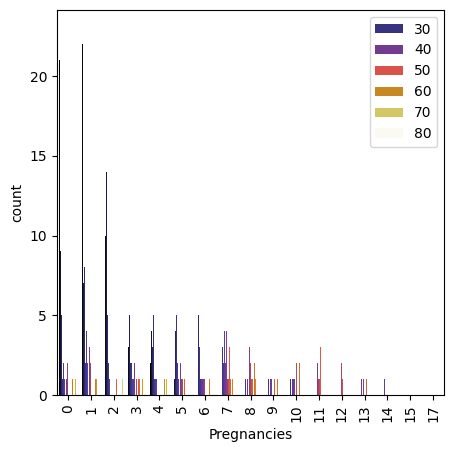

In [688]:
#Pregnancies vs age

fig, ax1 = plt.subplots(figsize=(5,5))
graph=sns.countplot(ax=ax1,x='Pregnancies',hue="Age",data=total_data, palette="CMRmap")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
plt.legend( loc = "best")

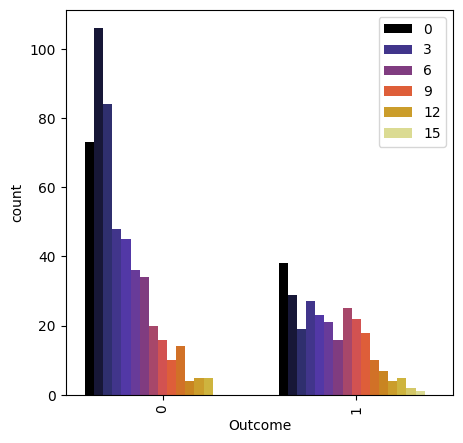

In [689]:
#outcome vs pregnancies
fig, ax1 = plt.subplots(figsize=(5,5))
graph=sns.countplot(ax=ax1,x='Outcome',hue="Pregnancies",data=total_data, palette="CMRmap")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
plt.legend( loc = "best")

<Axes: xlabel='Outcome', ylabel='Pregnancies'>

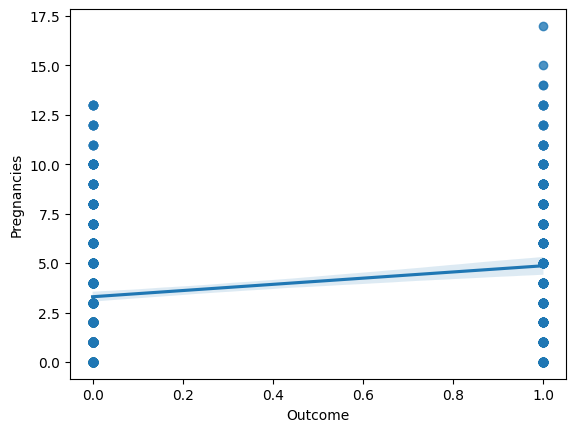

In [690]:
sns.regplot(x=total_data.Outcome, y =total_data.Pregnancies)

## **Step 3: Analysis of univariate variables**

### Analysis on categorical variables

In [691]:
categorical_columns = total_data.select_dtypes(include = ['O'])
categorical_columns.columns

Index([], dtype='object')

### Analysis on numeric variables

In [692]:
numerical_columns = total_data.select_dtypes(include = np.number)
numerical_columns.columns

Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
       'Age', 'Outcome'],
      dtype='object')

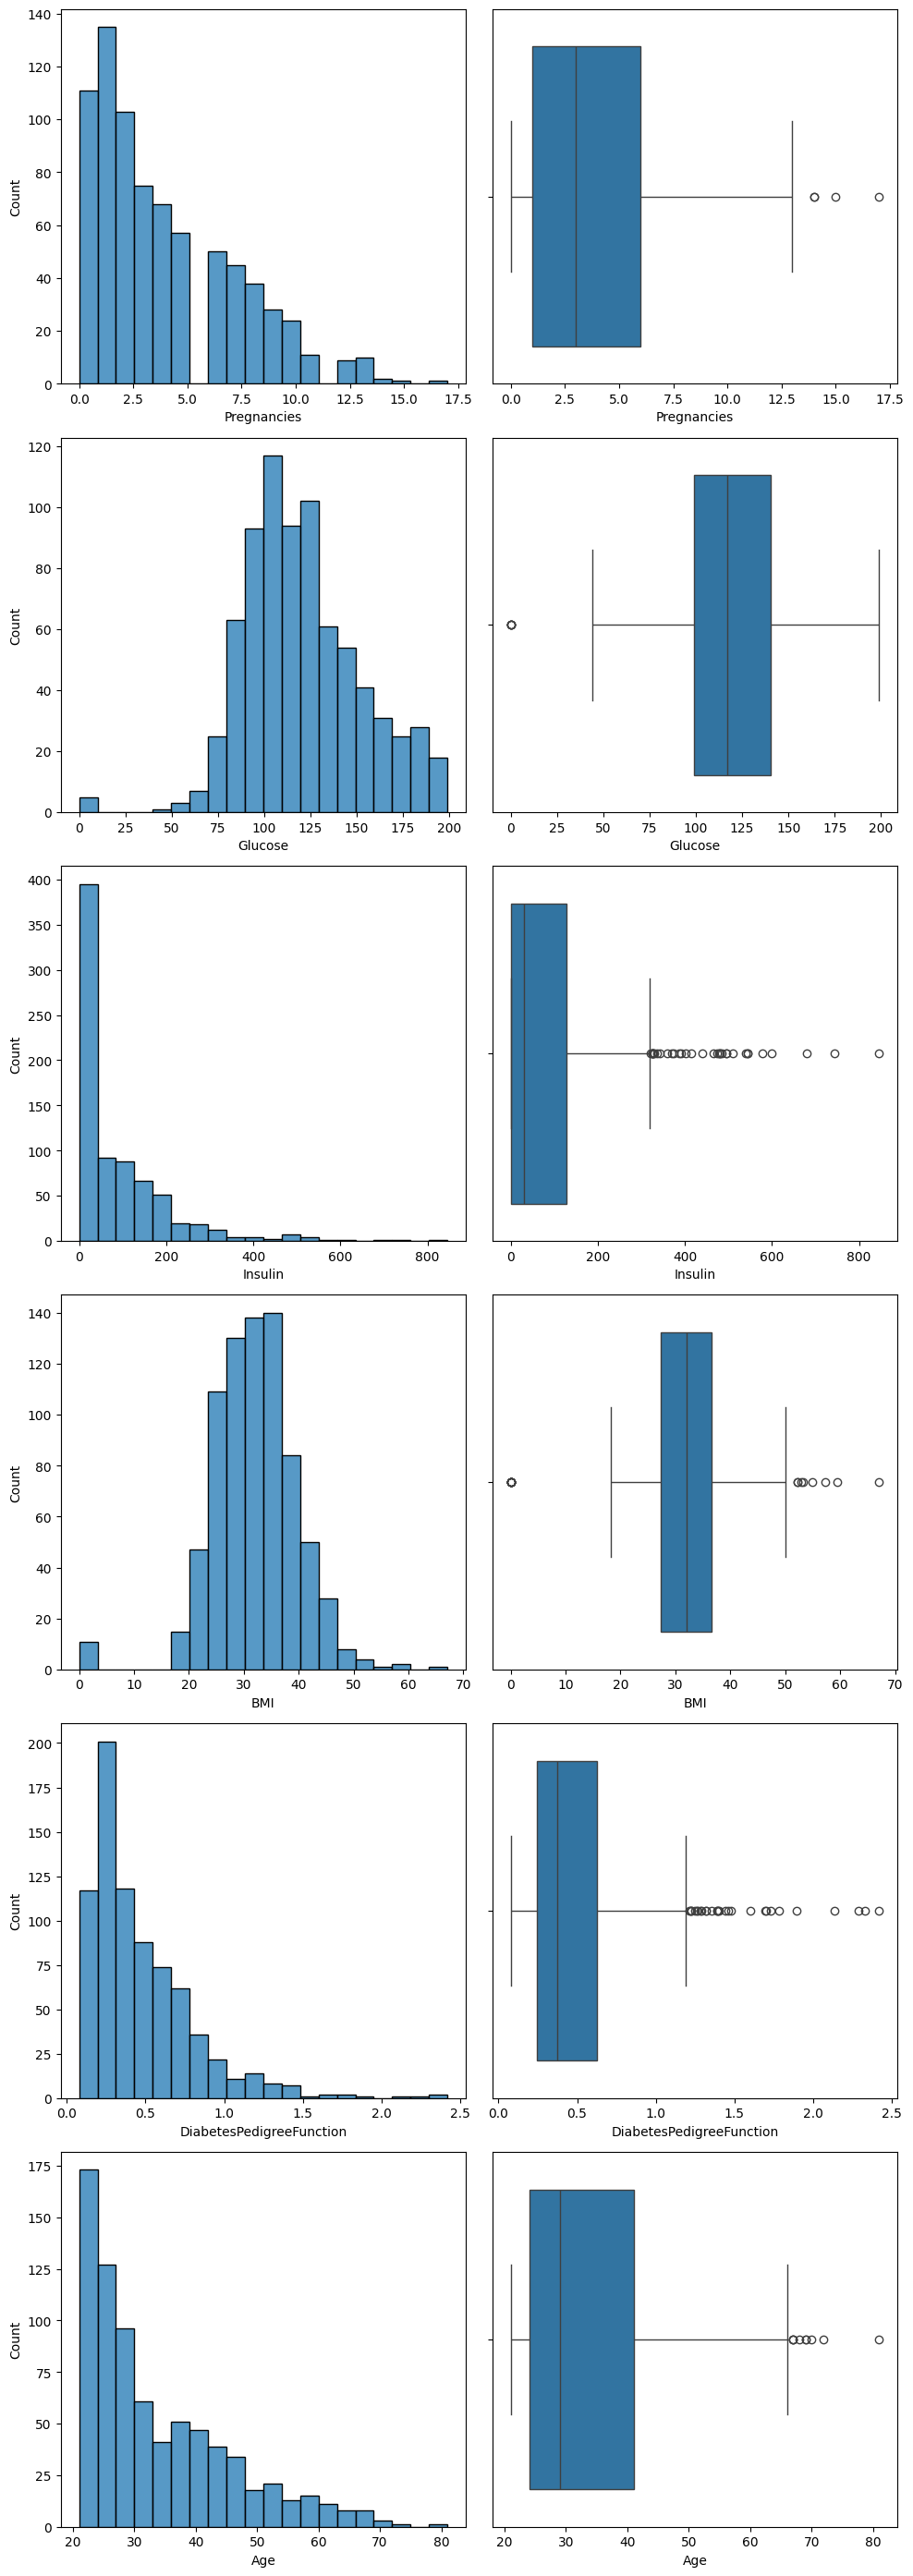

In [693]:
fig, axis = plt.subplots(6, 2, figsize=(10, 28))

# Plot histograms and boxplots for each variable
sns.histplot(ax=axis[0, 0], data=total_data, x="Pregnancies", bins=20)
sns.boxplot(ax=axis[0, 1], data=total_data, x="Pregnancies")

sns.histplot(ax=axis[1, 0], data=total_data, x="Glucose", bins=20)
sns.boxplot(ax=axis[1, 1], data=total_data, x="Glucose")

sns.histplot(ax=axis[2, 0], data=total_data, x="Insulin", bins=20)
sns.boxplot(ax=axis[2, 1], data=total_data, x="Insulin")

sns.histplot(ax=axis[3, 0], data=total_data, x="BMI", bins=20)
sns.boxplot(ax=axis[3, 1], data=total_data, x="BMI")

sns.histplot(ax=axis[4, 0], data=total_data, x="DiabetesPedigreeFunction", bins=20)
sns.boxplot(ax=axis[4, 1], data=total_data, x="DiabetesPedigreeFunction")

sns.histplot(ax=axis[5, 0], data=total_data, x="Age", bins=20)
sns.boxplot(ax=axis[5, 1], data=total_data, x="Age")


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## **Step 3b: Analysis of multivariate variables**

### Numerical-numerical analysis

In [694]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   Insulin                   768 non-null    int64  
 3   BMI                       768 non-null    float64
 4   DiabetesPedigreeFunction  768 non-null    float64
 5   Age                       768 non-null    int64  
 6   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 42.1 KB


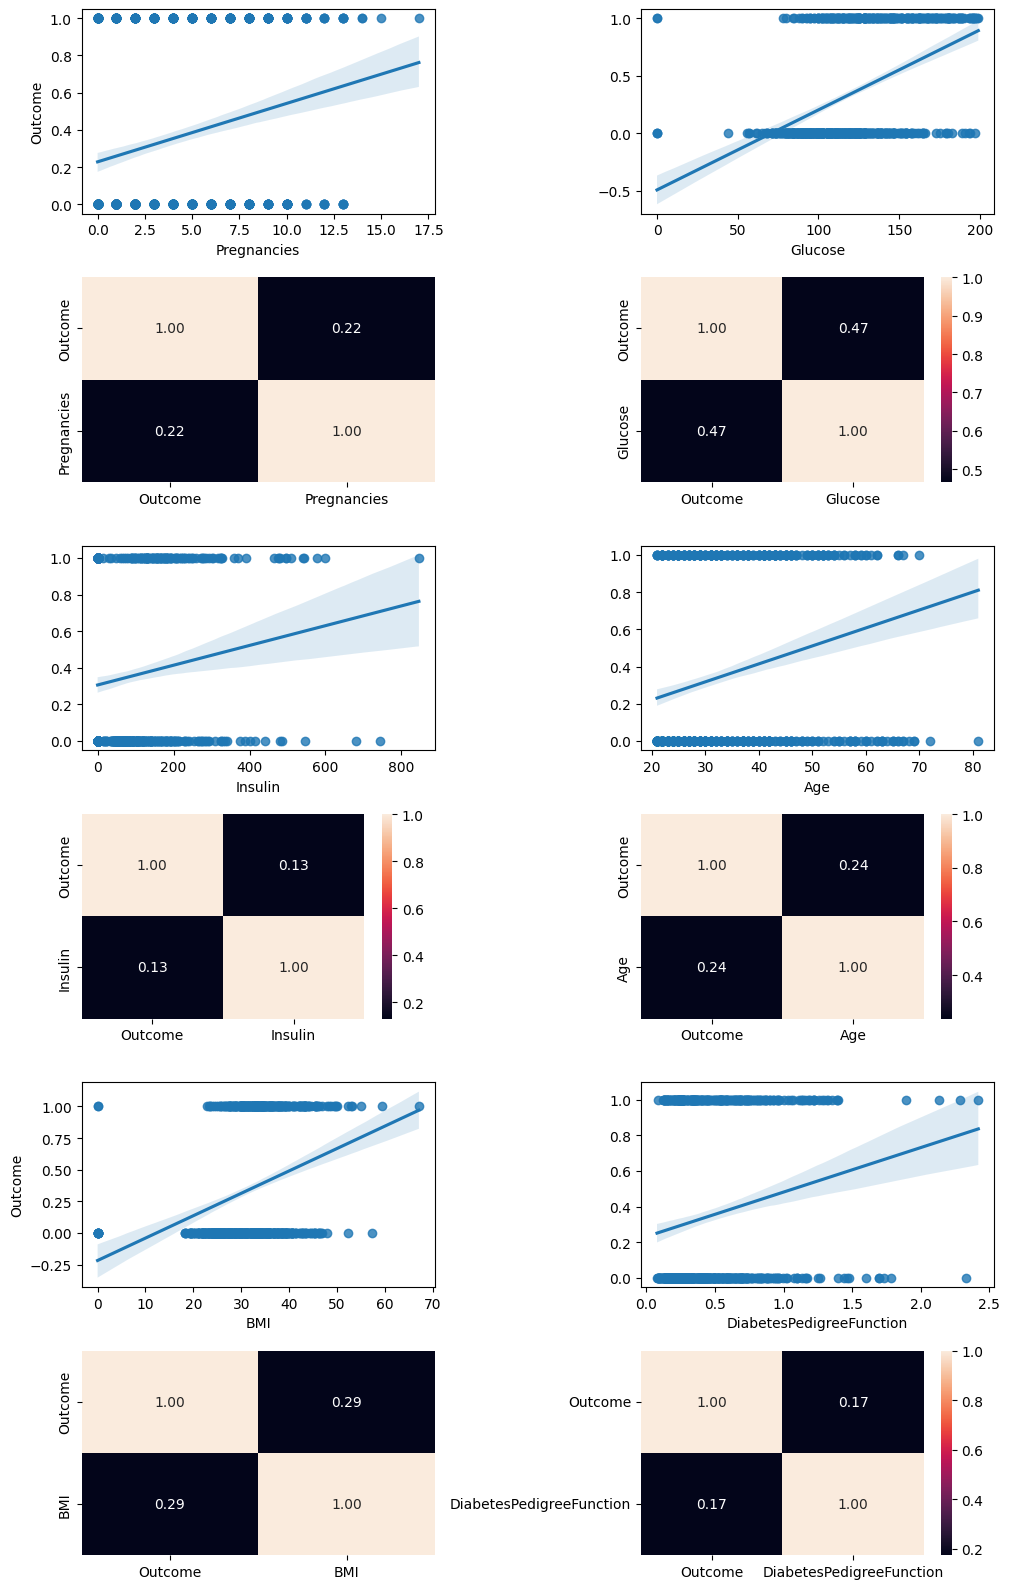

In [695]:
# Numerical - Numerical Analysis

# Create subplot canvas
fig, axis = plt.subplots(6, 2, figsize=(10, 16))

# Create plots
sns.regplot(ax=axis[0, 0], data=total_data, x="Pregnancies", y="Outcome")
sns.heatmap(total_data[["Outcome", "Pregnancies"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

sns.regplot(ax=axis[0, 1], data=total_data, x="Glucose", y="Outcome").set(ylabel=None)
sns.heatmap(total_data[["Outcome", "Glucose"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])

sns.regplot(ax=axis[2, 0], data=total_data, x="Insulin", y="Outcome").set(ylabel=None)
sns.heatmap(total_data[["Outcome", "Insulin"]].corr(), annot=True, fmt=".2f", ax=axis[3, 0]).set(ylabel=None)

sns.regplot(ax=axis[4, 0], data=total_data, x="BMI", y="Outcome")
sns.heatmap(total_data[["Outcome", "BMI"]].corr(), annot=True, fmt=".2f", ax=axis[5, 0], cbar=False)

sns.regplot(ax=axis[4, 1], data=total_data, x="DiabetesPedigreeFunction", y="Outcome").set(ylabel=None)
sns.heatmap(total_data[["Outcome", "DiabetesPedigreeFunction"]].corr(), annot=True, fmt=".2f", ax=axis[5, 1])

sns.regplot(ax=axis[2, 1], data=total_data, x="Age", y="Outcome").set(ylabel=None)
sns.heatmap(total_data[["Outcome", "Age"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1]).set(ylabel=None)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


## **Step 3c: Feature engineering**

### Outlier analysis

In [696]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   Insulin                   768 non-null    int64  
 3   BMI                       768 non-null    float64
 4   DiabetesPedigreeFunction  768 non-null    float64
 5   Age                       768 non-null    int64  
 6   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 42.1 KB


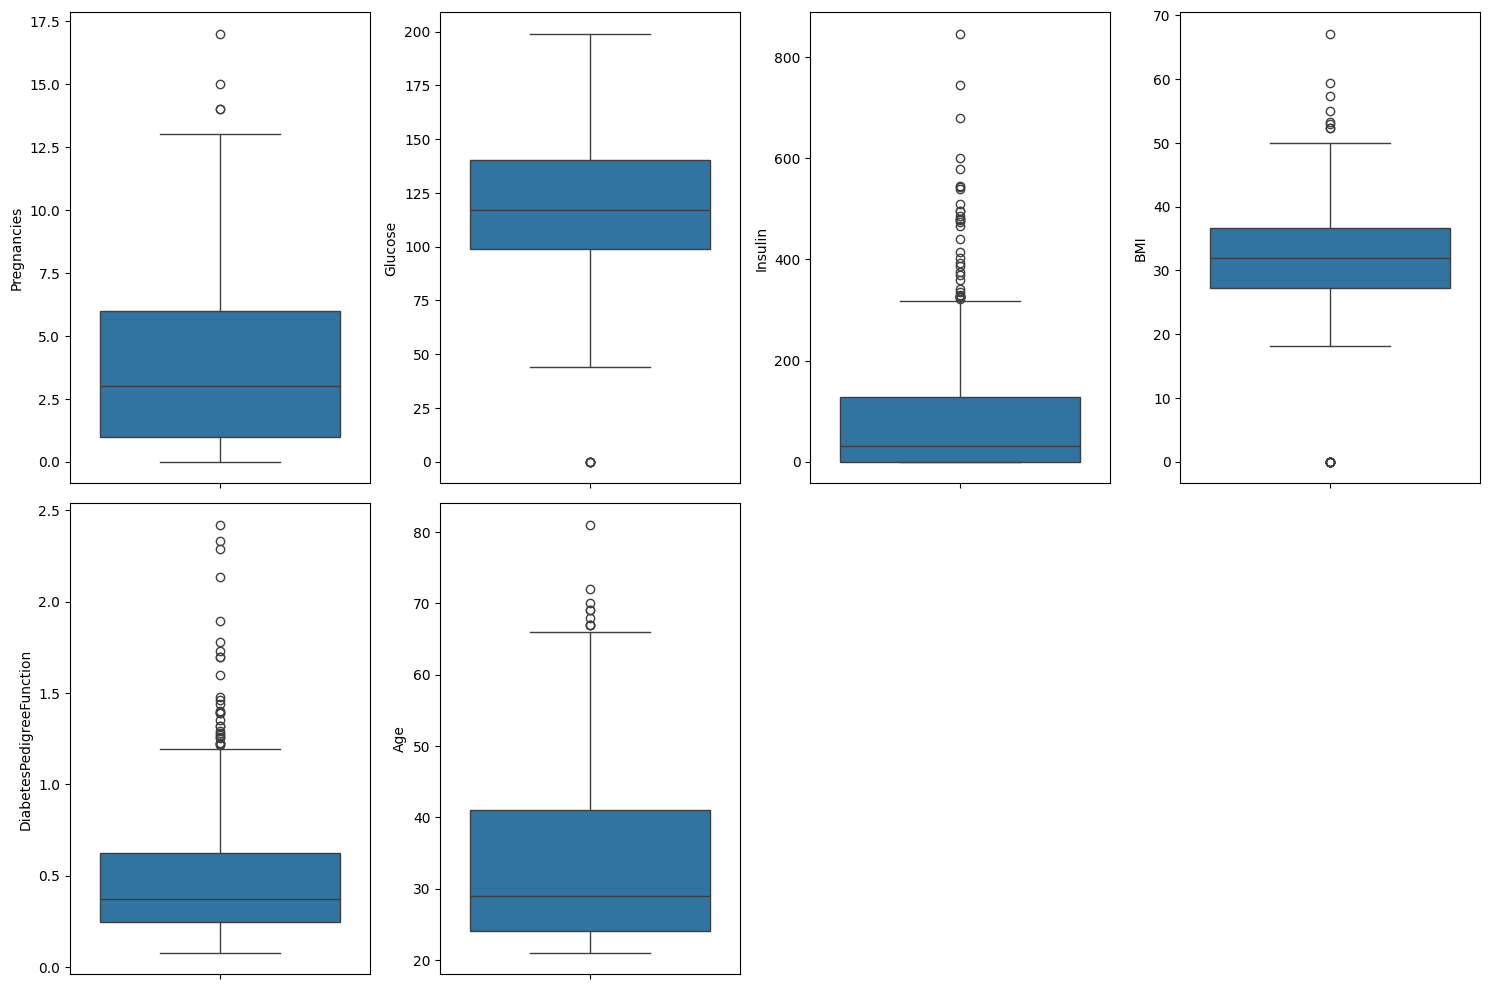

In [697]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

sns.boxplot(ax=axes[0, 0], data=total_data, y="Pregnancies")
sns.boxplot(ax=axes[0, 1], data=total_data, y="Glucose")
sns.boxplot(ax=axes[0, 2], data=total_data, y="Insulin")
sns.boxplot(ax=axes[0, 3], data=total_data, y="BMI")
sns.boxplot(ax=axes[1, 0], data=total_data, y="DiabetesPedigreeFunction")
sns.boxplot(ax=axes[1, 1], data=total_data, y="Age")


fig.delaxes(axes[1, 2])
fig.delaxes(axes[1, 3])


plt.tight_layout()


plt.show()

### Outlier detection and filter

In [698]:
# Stats for Insulin
total_data["Insulin"].describe()


count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

In [699]:
stats = total_data["Insulin"].describe()
stats

iqr = stats["75%"] - stats["25%"]
upper_limit = stats["75%"] + 1.5 * iqr
lower_limit = stats["25%"] - 1.5 * iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of 30")




The upper and lower limits for finding outliers are 318.12 and -190.88, with an interquartile range of 30


In [700]:
Total_data_ins = total_data[(total_data["Insulin"] > 0) & (total_data["Insulin"] < 350)]

In [701]:
Total_data_ins["Insulin"].describe()


count    369.000000
mean     131.994580
std       73.433162
min       14.000000
25%       75.000000
50%      120.000000
75%      176.000000
max      342.000000
Name: Insulin, dtype: float64

BMI

In [702]:
# Stats for BMI
total_data["BMI"].describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [703]:
stats = total_data["BMI"].describe()
stats

iqr = stats["75%"] - stats["25%"]
upper_limit = stats["75%"] + 1.5 * iqr
lower_limit = stats["25%"] - 1.5 * iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of 34")


The upper and lower limits for finding outliers are 50.55 and 13.35, with an interquartile range of 34


In [704]:

Total_data_bmi = total_data[(total_data["BMI"] > 0) & (total_data["BMI"] < 50)]

In [705]:
Total_data_bmi["BMI"].describe()

count    748.000000
mean      32.180214
std        6.462969
min       18.200000
25%       27.400000
50%       32.000000
75%       36.500000
max       49.700000
Name: BMI, dtype: float64

DiabetesPedigreeFunction  

In [706]:
# Stats for DiabetesPedigreeFunction  
total_data["DiabetesPedigreeFunction"].describe()

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

In [707]:
stats = total_data["DiabetesPedigreeFunction"].describe()
stats

iqr = stats["75%"] - stats["25%"]
upper_limit = stats["75%"] + 1.5 * iqr
lower_limit = stats["25%"] - 1.5 * iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of 0.30")


The upper and lower limits for finding outliers are 1.2 and -0.33, with an interquartile range of 0.30


In [708]:

Total_data_ped = total_data[(total_data["DiabetesPedigreeFunction"] > 0) & (total_data["DiabetesPedigreeFunction"] < 1)]

In [709]:
Total_data_ped["DiabetesPedigreeFunction"].describe()

count    717.000000
mean       0.408927
std        0.222392
min        0.078000
25%        0.237000
50%        0.344000
75%        0.564000
max        0.997000
Name: DiabetesPedigreeFunction, dtype: float64

In [710]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   Insulin                   768 non-null    int64  
 3   BMI                       768 non-null    float64
 4   DiabetesPedigreeFunction  768 non-null    float64
 5   Age                       768 non-null    int64  
 6   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 42.1 KB


In [711]:
# Replace columns in total_data with their cleaned versions
total_data['DiabetesPedigreeFunction'] = Total_data_ped['DiabetesPedigreeFunction']
total_data['BMI'] = Total_data_bmi['BMI']
total_data['Insulin'] = Total_data_ins['Insulin']

# Verify the changes
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   Insulin                   369 non-null    float64
 3   BMI                       748 non-null    float64
 4   DiabetesPedigreeFunction  717 non-null    float64
 5   Age                       768 non-null    int64  
 6   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 42.1 KB


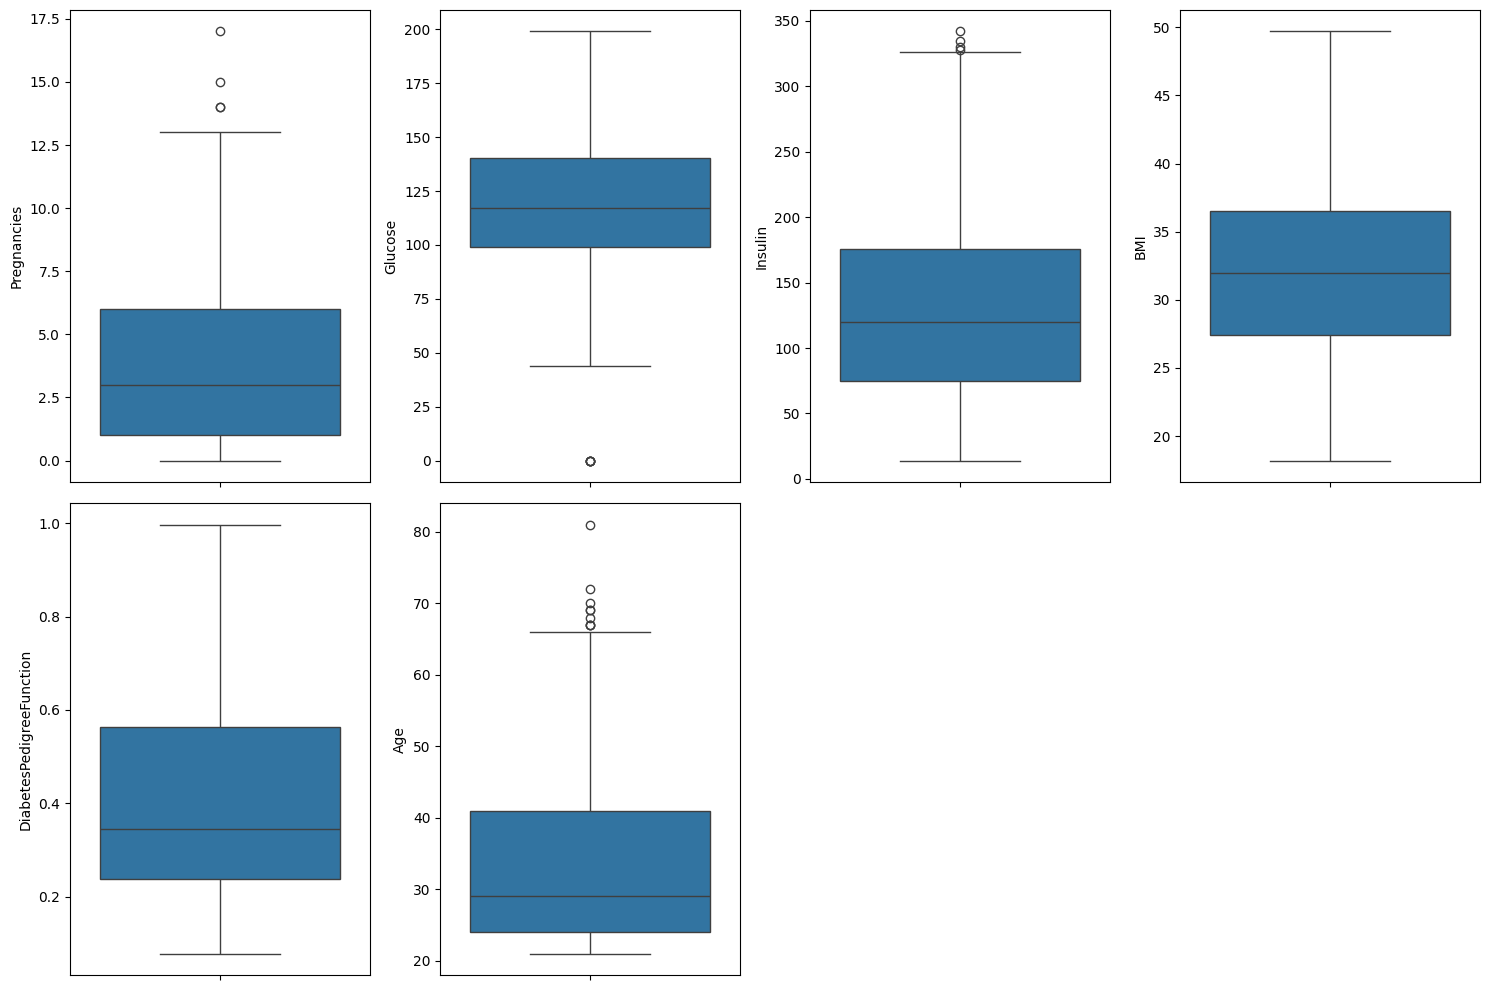

In [712]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

sns.boxplot(ax=axes[0, 0], data=total_data, y="Pregnancies")
sns.boxplot(ax=axes[0, 1], data=total_data, y="Glucose")
sns.boxplot(ax=axes[0, 2], data=total_data, y="Insulin")
sns.boxplot(ax=axes[0, 3], data=total_data, y="BMI")
sns.boxplot(ax=axes[1, 0], data=total_data, y="DiabetesPedigreeFunction")
sns.boxplot(ax=axes[1, 1], data=total_data, y="Age")


fig.delaxes(axes[1, 2])
fig.delaxes(axes[1, 3])


plt.tight_layout()


plt.show()

<Axes: >

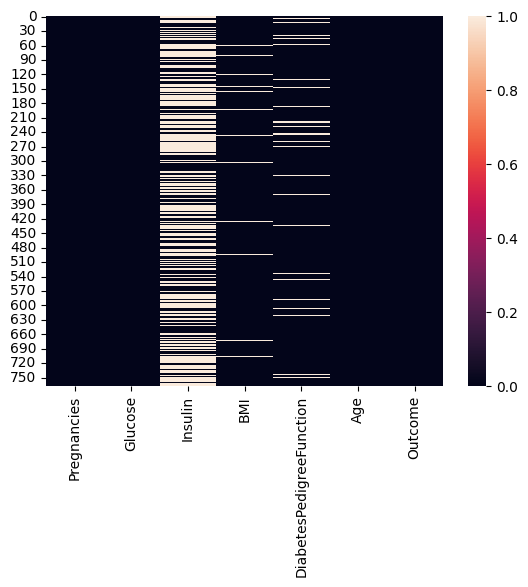

In [713]:
sns.heatmap(total_data.isnull())

In [714]:
# Fill missing values in total_data with corresponding values from cleaned DataFrames
total_data['DiabetesPedigreeFunction'].fillna(Total_data_ped['DiabetesPedigreeFunction'].reset_index(drop=True), inplace=True)
total_data['BMI'].fillna(Total_data_bmi['BMI'].reset_index(drop=True), inplace=True)
total_data['Insulin'].fillna(Total_data_ins['Insulin'].reset_index(drop=True), inplace=True)

# Verify the changes
total_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   Insulin                   567 non-null    float64
 3   BMI                       768 non-null    float64
 4   DiabetesPedigreeFunction  764 non-null    float64
 5   Age                       768 non-null    int64  
 6   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 42.1 KB


In [715]:
#Interpolate
total_data['Insulin'].interpolate(method='linear', inplace=True)
total_data['DiabetesPedigreeFunction'].interpolate(method='linear', inplace=True)

total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   Insulin                   768 non-null    float64
 3   BMI                       768 non-null    float64
 4   DiabetesPedigreeFunction  768 non-null    float64
 5   Age                       768 non-null    int64  
 6   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 42.1 KB


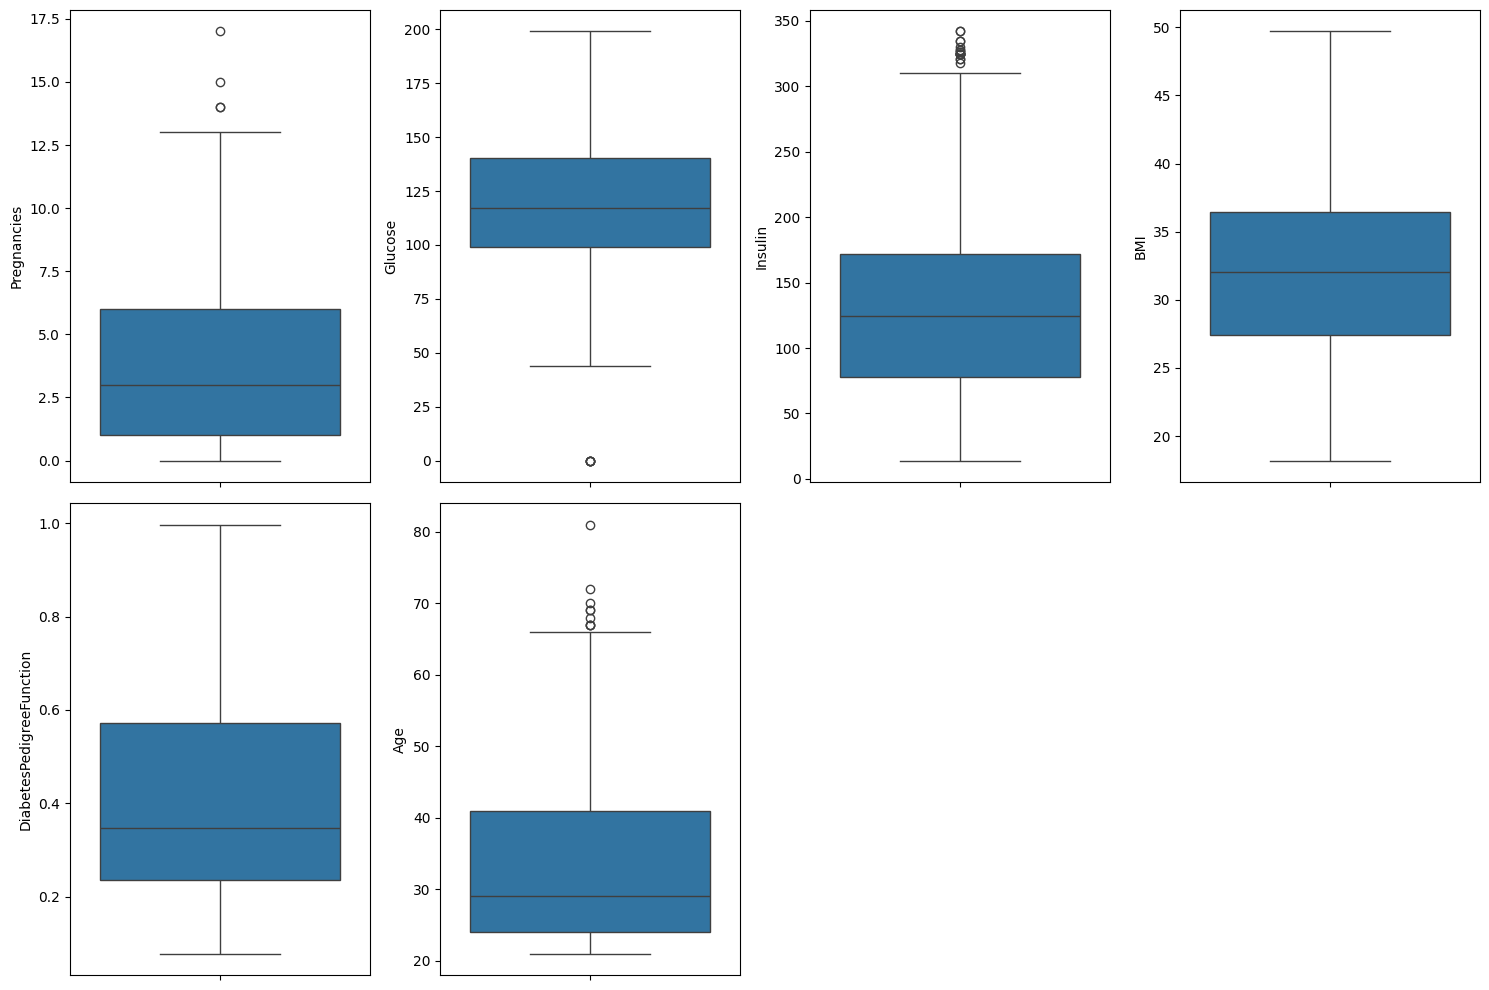

In [716]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

sns.boxplot(ax=axes[0, 0], data=total_data, y="Pregnancies")
sns.boxplot(ax=axes[0, 1], data=total_data, y="Glucose")
sns.boxplot(ax=axes[0, 2], data=total_data, y="Insulin")
sns.boxplot(ax=axes[0, 3], data=total_data, y="BMI")
sns.boxplot(ax=axes[1, 0], data=total_data, y="DiabetesPedigreeFunction")
sns.boxplot(ax=axes[1, 1], data=total_data, y="Age")


fig.delaxes(axes[1, 2])
fig.delaxes(axes[1, 3])


plt.tight_layout()


plt.show()

In [717]:
"""# Initialize an empty list to store filtered DataFrames
cleaned_dataframes = []

# Define the columns for which you want to filter outliers
columns_to_filter = ["Pregnancies", "Glucose", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Iterate over each column and filter outliers
for column in columns_to_filter:
    # Calculate upper and lower limits for the current column (similar to your previous calculation)
    column_stats = total_data[column].describe()
    column_iqr = column_stats["75%"] - column_stats["25%"]
    upper_limit = column_stats["75%"] + 1.5 * column_iqr
    lower_limit = column_stats["25%"] - 1.5 * column_iqr
    
    # Filter the DataFrame based on the upper and lower limits
    filtered_data = total_data[(total_data[column] <= upper_limit) & (total_data[column] >= lower_limit)]
    
    # Append the filtered DataFrame to the list
    cleaned_dataframes.append(filtered_data)

# Concatenate all filtered DataFrames into a single DataFrame
total_data_cleaned = pd.concat(cleaned_dataframes)

# Check the shape of the cleaned DataFrame to see how many outliers were removed
print("Shape of cleaned DataFrame:", total_data_cleaned.shape)
"""

'# Initialize an empty list to store filtered DataFrames\ncleaned_dataframes = []\n\n# Define the columns for which you want to filter outliers\ncolumns_to_filter = ["Pregnancies", "Glucose", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]\n\n# Iterate over each column and filter outliers\nfor column in columns_to_filter:\n    # Calculate upper and lower limits for the current column (similar to your previous calculation)\n    column_stats = total_data[column].describe()\n    column_iqr = column_stats["75%"] - column_stats["25%"]\n    upper_limit = column_stats["75%"] + 1.5 * column_iqr\n    lower_limit = column_stats["25%"] - 1.5 * column_iqr\n    \n    # Filter the DataFrame based on the upper and lower limits\n    filtered_data = total_data[(total_data[column] <= upper_limit) & (total_data[column] >= lower_limit)]\n    \n    # Append the filtered DataFrame to the list\n    cleaned_dataframes.append(filtered_data)\n\n# Concatenate all filtered DataFrames into a single DataFrame\

In [718]:
"""# Concatenate all DataFrames into a single DataFrame
total_cleaned_data = pd.concat(cleaned_dataframes, ignore_index=True)

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

# Plot boxplots
sns.boxplot(ax=axes[0, 0], data=total_cleaned_data, y="Pregnancies")
sns.boxplot(ax=axes[0, 1], data=total_cleaned_data, y="Glucose")
sns.boxplot(ax=axes[0, 2], data=total_cleaned_data, y="Insulin")
sns.boxplot(ax=axes[0, 3], data=total_cleaned_data, y="BMI")
sns.boxplot(ax=axes[1, 0], data=total_cleaned_data, y="DiabetesPedigreeFunction")
sns.boxplot(ax=axes[1, 1], data=total_cleaned_data, y="Age")

# Remove empty subplots
fig.delaxes(axes[1, 2])
fig.delaxes(axes[1, 3])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()"""


'# Concatenate all DataFrames into a single DataFrame\ntotal_cleaned_data = pd.concat(cleaned_dataframes, ignore_index=True)\n\n# Create subplots\nfig, axes = plt.subplots(2, 4, figsize=(15, 10))\n\n# Plot boxplots\nsns.boxplot(ax=axes[0, 0], data=total_cleaned_data, y="Pregnancies")\nsns.boxplot(ax=axes[0, 1], data=total_cleaned_data, y="Glucose")\nsns.boxplot(ax=axes[0, 2], data=total_cleaned_data, y="Insulin")\nsns.boxplot(ax=axes[0, 3], data=total_cleaned_data, y="BMI")\nsns.boxplot(ax=axes[1, 0], data=total_cleaned_data, y="DiabetesPedigreeFunction")\nsns.boxplot(ax=axes[1, 1], data=total_cleaned_data, y="Age")\n\n# Remove empty subplots\nfig.delaxes(axes[1, 2])\nfig.delaxes(axes[1, 3])\n\n# Adjust layout\nplt.tight_layout()\n\n# Show the plot\nplt.show()'

## **Step 4: Feature Selection**

In [719]:
X = total_data.drop("Outcome", axis = 1)
y = total_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(k = 6) 
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,84.0,49.000000,25.4,0.304,21.0
1,9.0,112.0,63.333333,28.2,0.217,50.0
2,1.0,139.0,83.000000,28.7,0.654,22.0
3,0.0,161.0,41.000000,21.9,0.254,65.0
4,6.0,134.0,49.000000,46.2,0.238,46.0


In [720]:
X_test_sel.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,98.0,190.000000,34.0,0.430,43.0
1,2.0,112.0,132.000000,35.7,0.148,21.0
2,2.0,108.0,84.500000,30.8,0.158,21.0
3,8.0,107.0,151.666667,24.6,0.856,34.0
4,7.0,136.0,169.142857,29.9,0.210,50.0


In [721]:
X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

## **Step 4 Decision Tree model**

In [722]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,84.0,49.000000,25.4,0.304,21.0,0
1,9.0,112.0,63.333333,28.2,0.217,50.0,1
2,1.0,139.0,83.000000,28.7,0.654,22.0,0
3,0.0,161.0,41.000000,21.9,0.254,65.0,0
4,6.0,134.0,49.000000,46.2,0.238,46.0,1


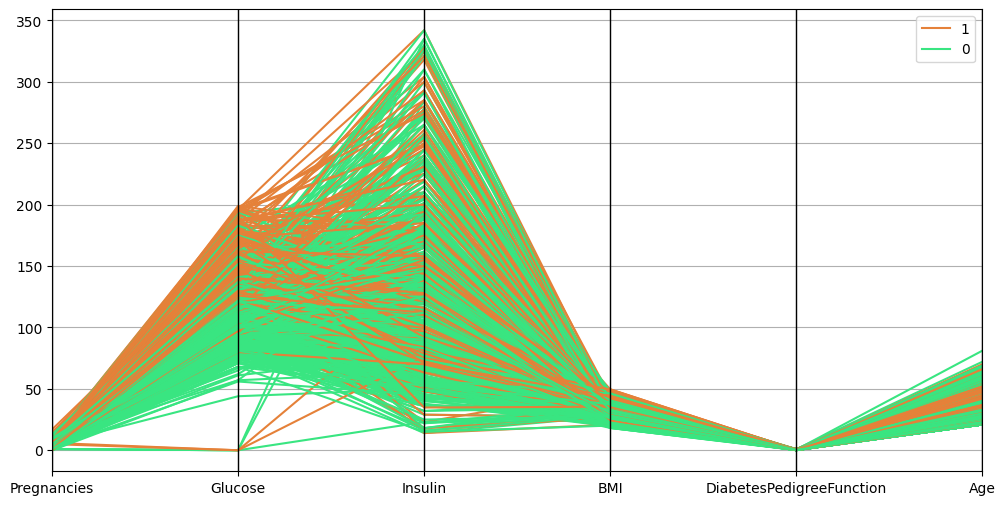

In [723]:
plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(total_data, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

plt.show()

In [724]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

In [725]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

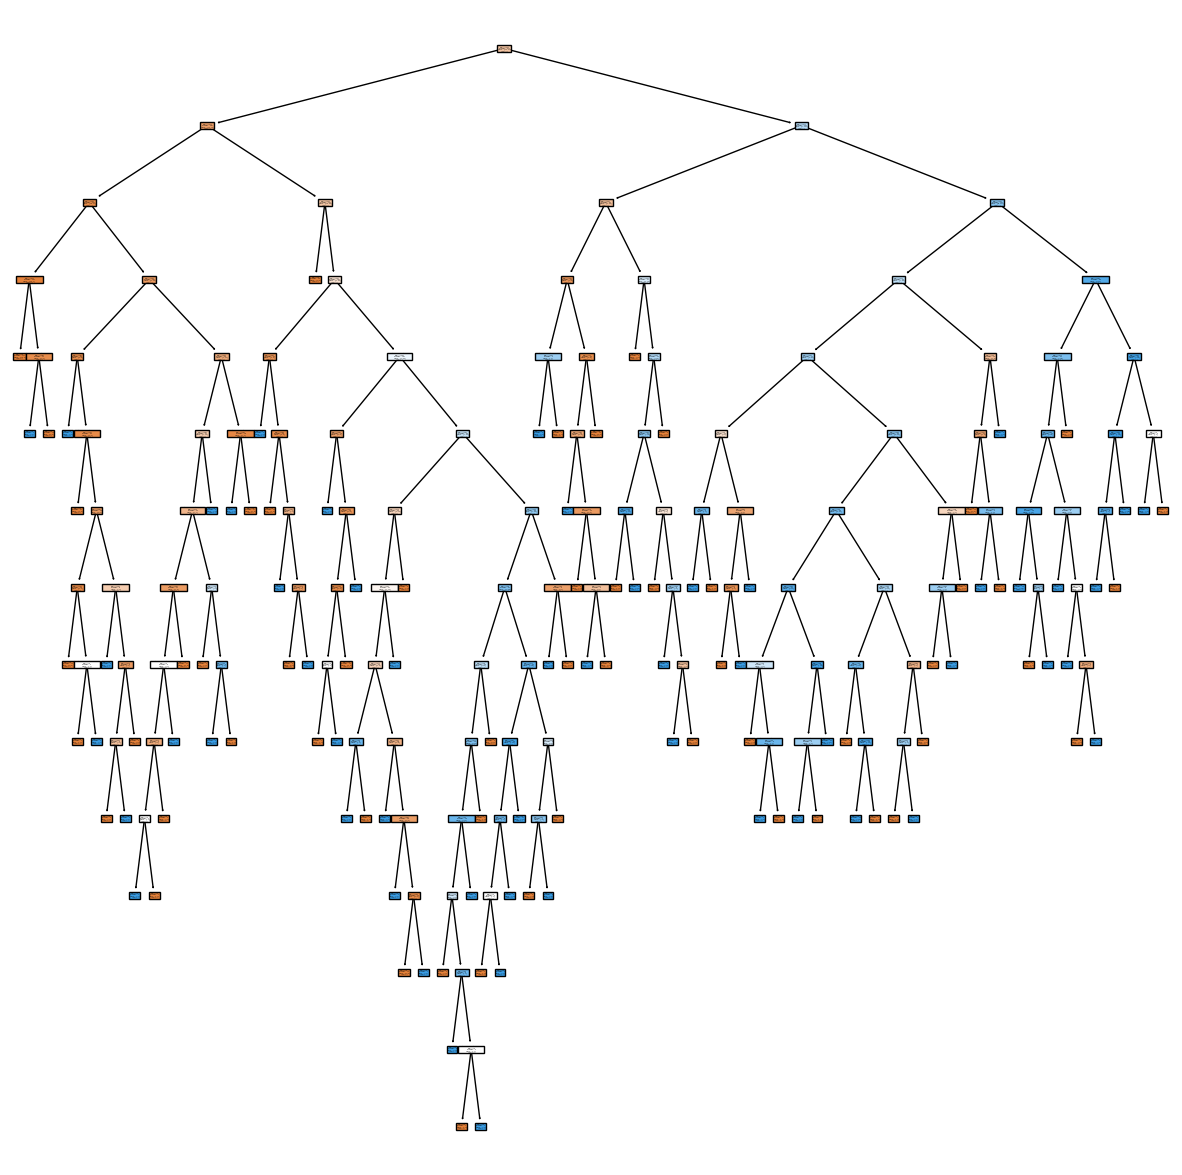

In [726]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [727]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [728]:
accuracy_score(y_test, y_pred)

0.7012987012987013

## **Step 4: Model optimization**

In [729]:
hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [730]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [731]:
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 5, min_samples_leaf = 4, min_samples_split = 2, random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       random_state=42)

In [732]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [733]:
accuracy_score(y_test, y_pred)

0.7207792207792207

In [734]:
print("Gloabl Elapsed Time ", timeit.default_timer() - global_start_time)

Gloabl Elapsed Time  34.28123415200025


In [735]:
dump(model, open("../models/tree_classifier_crit-entro_maxdepth-5_minleaf-4_minsplit2_42.sav", "wb"))